## random forest with Grid search

In [58]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import csv

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train = pd.read_csv('train_normalized.csv')
df_test = pd.read_csv('test_normalized.csv')

In [59]:
# Select  all features, but SalePrice
x = df_train[['MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'Foundation', 'BsmtQualFin_1and2', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea',
       'Fireplaces', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'TotalBath', 'TotalPorchSF', 'MSSubclass_category', 'TotalQual']]

x_test = df_test[['MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'Foundation', 'BsmtQualFin_1and2', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea',
       'Fireplaces', 'GarageCars', 'PavedDrive',
       'WoodDeckSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'TotalBath', 'TotalPorchSF', 'MSSubclass_category', 'TotalQual']]

#regressor values
#df_train['SalePrice'] = np.exp(df_train['SalePrice'])
#df_train['SalePrice'] = df_train['SalePrice'].astype(np.int64, copy=False)

y = df_train['SalePrice']


In [60]:
x.shape

(1453, 30)

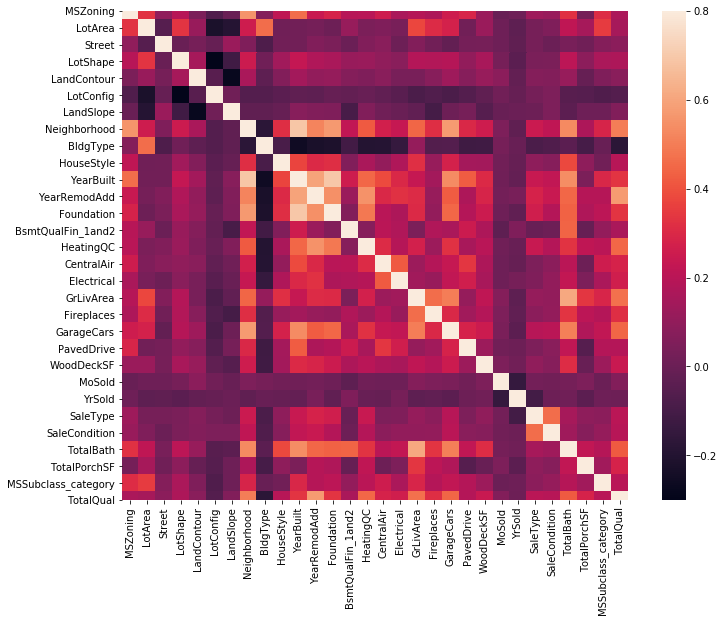

In [61]:
import matplotlib.pyplot as plt
corrmat = x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [38]:
x_test.describe(include='all')

,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Foundation,BsmtTotalQual,HeatingQC,CentralAir,Electrical,GrLivArea,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,TotalBath,TotalPorchSF,MSSubclass_category,TotalQual
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,36.812886,9.078721,1.995888,13.920493,20.753941,4.206306,2.954764,12.551062,2.908156,5.236463,1971.357779,1983.662783,4.281014,12.715954,4.158328,0.930775,4.874572,7.253745,7.854695,0.58122,1.764907,2.805346,2.438407,6.104181,2007.769705,6.984236,4.833448,2.223098,3.236358,25.442084,350.187800
std,8.440867,0.502030,0.064018,5.578642,4.897486,1.382554,0.217566,6.829239,0.718028,1.506142,30.390071,21.130467,1.621356,4.139875,0.956684,0.253924,0.495554,0.316152,0.610379,0.64742,0.777056,0.574204,2.586122,2.722432,1.301740,1.049736,0.878226,0.834621,2.156807,6.918587,71.433166
min,10.000000,7.293018,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1879.000000,1950.000000,1.000000,1.001664,1.000000,0.000000,1.000000,6.008813,2.000000,0.00000,0.000000,1.000000,0.000000,1.000000,2006.000000,1.000000,1.000000,0.000000,0.000000,10.000000,77.000000
25%,40.000000,8.908018,2.000000,10.000000,20.000000,3.000000,3.000000,7.000000,3.000000,5.000000,1953.000000,1963.000000,3.000000,9.972409,3.000000,1.000000,5.000000,7.018849,8.000000,0.00000,1.000000,3.000000,0.000000,4.000000,2007.000000,7.000000,5.000000,1.500000,0.000000,20.000000,306.000000
50%,40.000000,9.148359,2.000000,10.000000,20.000000,5.000000,3.000000,12.000000,3.000000,5.000000,1973.000000,1992.000000,3.000000,11.750000,5.000000,1.000000,5.000000,7.266827,8.000000,0.00000,2.000000,3.000000,0.000000,6.000000,2008.000000,7.000000,5.000000,2.000000,4.007333,30.000000,345.000000
75%,40.000000,9.351623,2.000000,20.000000,20.000000,5.000000,3.000000,17.000000,3.000000,7.000000,2001.000000,2004.000000,6.000000,15.972146,5.000000,1.000000,5.000000,7.450661,8.000000,1.00000,2.000000,3.000000,5.123964,8.000000,2009.000000,7.000000,5.000000,3.000000,4.912655,30.000000,396.000000
max,50.000000,10.943764,2.000000,40.000000,40.000000,5.000000,3.000000,25.000000,5.000000,7.000000,2010.000000,2010.000000,6.000000,26.478755,5.000000,1.000000,5.000000,8.536015,8.000000,4.00000,5.000000,3.000000,7.261225,12.000000,2010.000000,10.000000,6.000000,7.000000,7.095893,30.000000,750.000000


In [46]:
# thanks to 
# https://habr.com/ru/company/ods/blog/324402/

# Инициализируем страифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

# defauly parameters model
rfr = RandomForestRegressor(random_state=33)

# Обучаем на тренировочном датасете
results = cross_val_score(rfr, x, y, cv=skf)

# Оцениваем долю верных ответов на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 86.74%


In [62]:
# Perform train, test, split
#x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2)

#df_result_x = pd.DataFrame()
df_result_x_test = pd.DataFrame(data={'Id': df_test['Id'], 'SalePrice': 0})

In [48]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
'''train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfr = RandomForestRegressor(n_estimators=ntrees, random_state=33, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(x, y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_acc.append(rfr.score(X_train, y_train))
        temp_test_acc.append(rfr.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))'''

In [49]:
parameters = {'max_features': [15,18], 'max_depth': [20,25], 'n_estimators': [300, 400]}
rfr = RandomForestRegressor(random_state=33, n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfr, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(x, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.9s finished
C:\ProgramData\Anaconda3\envs\ml_common\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=33, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=True, random_state=33,
                                             verbose=0, warm_start=False),
             iid='warn', n_jo

In [50]:
print(f'Best estimator: {gcv.best_estimator_}')
print(f'Best score: {gcv.best_score_}')
print(f'Best params: {gcv.best_params_}')

Best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=18, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=True, random_state=33, verbose=0,
                      warm_start=False)
Best score: 0.8908916921180541
Best params: {'max_depth': 20, 'max_features': 18, 'n_estimators': 300}


In [63]:
best_rfr = RandomForestRegressor(max_depth=20, max_features=18, 
                      min_impurity_decrease=0.0, min_impurity_split=None,                      
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=True)
best_rfr.fit(x, y)

df_result_x_test['SalePrice'] = best_rfr.predict(x_test)

In [64]:

df_result_x_test['SalePrice'] = np.exp(df_result_x_test['SalePrice'])
df_result_x_test['SalePrice'] = df_result_x_test['SalePrice'].astype(np.int64, copy=False)
df_result_x_test.to_csv('rf_grid_submission.csv', index=False)